In [3]:
import pandas as pd

# Step 1: Read the CSV file
file_path = '/vols/cms/mm1221/hgcal/CLpi/Hyper/hyperparam_summary.csv'  # Path to the uploaded file
data = pd.read_csv(file_path)

# Step 2: Calculate combined score
data['Combined_Score'] = data['Efficiency'] + (1 - data['Fake_Rate'])

# Step 3: Sort data based on Combined Score
data_sorted = data.sort_values(by='Combined_Score', ascending=False)

# Step 4: Display top-performing combinations
top_combinations = data_sorted.head(10)
print("Top 10 Hyperparameter Combinations based on Combined Score:\n")
print(top_combinations[['Hyperparams', 'Best_Val_Loss', 'Efficiency', 'Fake_Rate', 'Combined_Score']])



Top 10 Hyperparameter Combinations based on Combined Score:

                             Hyperparams  Best_Val_Loss  Efficiency  \
44    lr0.005_bs32_hd128_k24_temp0.1_cd8   1.447191e-06    0.920398   
53   lr0.005_bs64_hd32_k24_temp0.1_cd128   2.116768e-06    0.915423   
34     lr0.005_bs32_hd32_k24_temp0.1_cd8   2.255720e-06    0.885572   
57   lr0.005_bs64_hd64_k24_temp0.1_cd128   1.268656e-06    0.880597   
13   lr0.001_bs32_hd64_k64_temp0.1_cd128   2.024440e-07    0.870647   
16     lr0.001_bs64_hd32_k24_temp0.1_cd8   1.736242e-06    0.870647   
30    lr0.001_bs64_hd128_k48_temp0.1_cd8   1.451585e-07    0.840796   
46  lr0.005_bs32_hd128_k24_temp0.1_cd128   5.940136e-07    0.835821   
48   lr0.005_bs32_hd64_k64_temp0.1_cd128   4.346255e-07    0.860697   
62   lr0.005_bs64_hd64_k64_temp0.1_cd128   3.496935e-07    0.850746   

    Fake_Rate  Combined_Score  
44   0.065421        1.854977  
53   0.070093        1.845329  
34   0.074766        1.810806  
57   0.070093        1.810504


Average metrics by lr-value:

   lr_value  Combined_Score  Efficiency  Fake_Rate
0         0         1.75167    0.812345   0.060675


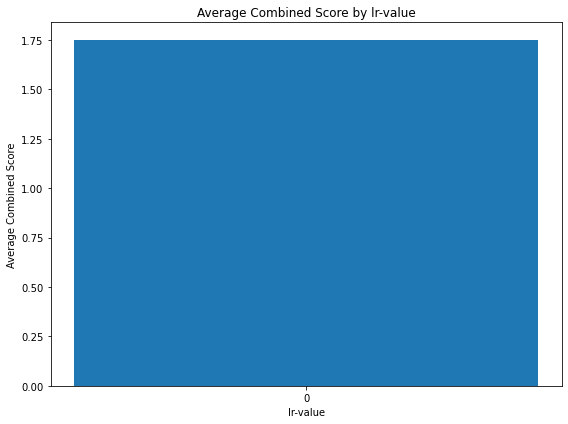


Average metrics by bs-value:

   bs_value  Combined_Score  Efficiency  Fake_Rate
0        32        1.751945    0.812555   0.060610
1        64        1.751358    0.812106   0.060748


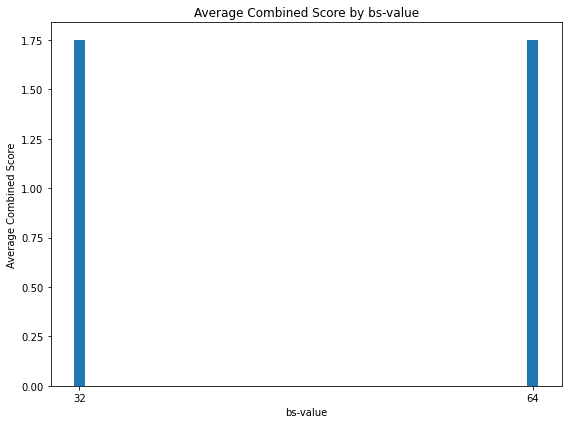


Average metrics by hd-value:

   hd_value  Combined_Score  Efficiency  Fake_Rate
0        32        1.745750    0.808250   0.062500
1        64        1.752144    0.815016   0.062872
2       128        1.758983    0.814538   0.055556


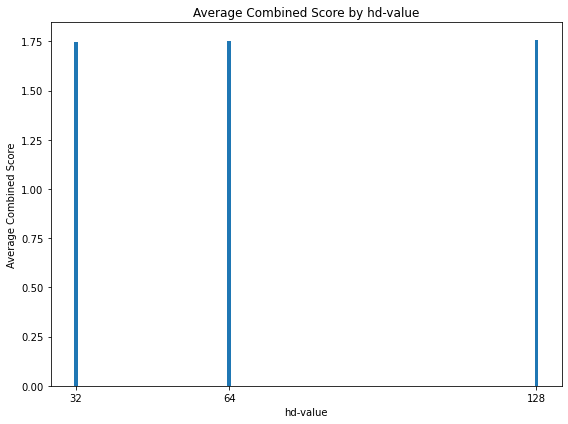


Average metrics by k-value:

   k_value  Combined_Score  Efficiency  Fake_Rate
0       24        1.761282    0.822842   0.061560
1       48        1.743303    0.802352   0.059048
2       64        1.749722    0.811207   0.061485


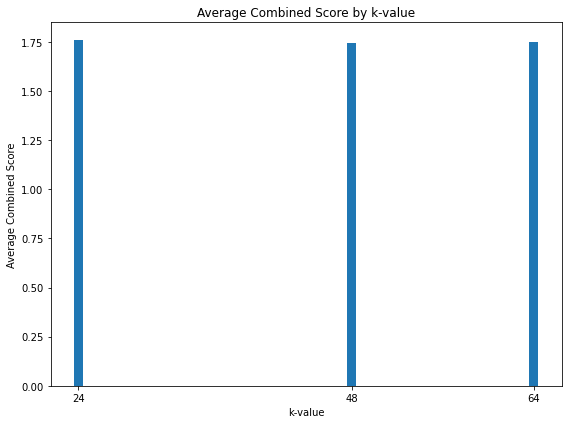


Average metrics by cd-value:

   cd_value  Combined_Score  Efficiency  Fake_Rate
0         8        1.752206    0.811748   0.059542
1       128        1.751166    0.812905   0.061739


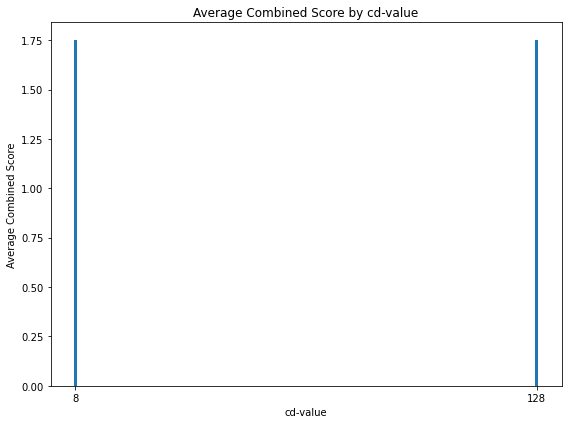

In [9]:
import matplotlib.pyplot as plt
import re

# Step 5: Extract hyperparameters and analyze all hyperparams
def extract_param_value(hyperparam_str, param):
    match = re.search(rf'{param}(\d+)', hyperparam_str)
    return int(match.group(1)) if match else None

hyperparams = ['lr','bs', 'hd', 'k', 'cd']
for param in hyperparams:
    data[f'{param}_value'] = data['Hyperparams'].apply(lambda x: extract_param_value(x, param))

# Step 6: Group by each hyperparameter and calculate average metrics
for param in hyperparams:
    param_summary = data.groupby(f'{param}_value').agg({
        'Combined_Score': 'mean',
        'Efficiency': 'mean',
        'Fake_Rate': 'mean'
    }).reset_index()
    
    print(f"\nAverage metrics by {param}-value:\n")
    print(param_summary)
    
    # Step 7: Plot the average Combined Score by hyperparameter
    plt.figure(figsize=(8, 6))
    plt.bar(param_summary[f'{param}_value'], param_summary['Combined_Score'])
    plt.xlabel(f'{param}-value')
    plt.ylabel('Average Combined Score')
    plt.title(f'Average Combined Score by {param}-value')
    plt.xticks(param_summary[f'{param}_value'])
    plt.tight_layout()
    plt.show()